In [1]:
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName('Varun').getOrCreate()

In [3]:
spark

User Activity Log continue

In [4]:
df2=spark.read.csv('user_activity_log.csv',header=True,inferSchema=True)

In [5]:
df2.show()

+------+-----------+-------------------+
|UserID|   Activity|          Timestamp|
+------+-----------+-------------------+
|   485|ViewProduct|2024-12-13 12:49:38|
|   626|ViewProduct|2024-12-06 18:06:12|
|   807|     Search|2024-12-20 15:30:21|
|    50|     Search|2024-12-12 18:49:43|
|   370|ViewProduct|2024-12-08 11:37:11|
|   936|   Purchase|2024-11-25 10:16:43|
|    18|ViewProduct|2024-11-24 21:37:40|
|    17|ViewProduct|2024-12-02 16:17:16|
|   388|  AddToCart|2024-11-28 03:40:03|
|   179|     Logout|2024-12-03 09:08:41|
|   328|      Login|2024-11-29 04:35:56|
|   528|   Purchase|2024-12-19 00:12:44|
|   276|      Login|2024-12-02 04:00:53|
|   526|      Login|2024-11-24 04:28:10|
|   375|     Logout|2024-11-24 18:25:11|
|   213|   Purchase|2024-12-02 07:57:25|
|   609|  AddToCart|2024-12-01 16:55:30|
|   456|  AddToCart|2024-12-08 16:54:21|
|   830|     Logout|2024-12-13 02:16:10|
|   635|ViewProduct|2024-12-03 15:05:27|
+------+-----------+-------------------+
only showing top

In [6]:
df2.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- Activity: string (nullable = true)
 |-- Timestamp: timestamp (nullable = true)



In [7]:
import pyspark.sql.functions as F
df2=df2.withColumn('DOW',F.dayofweek(df2.Timestamp))

In [8]:
df2.show()

+------+-----------+-------------------+---+
|UserID|   Activity|          Timestamp|DOW|
+------+-----------+-------------------+---+
|   485|ViewProduct|2024-12-13 12:49:38|  6|
|   626|ViewProduct|2024-12-06 18:06:12|  6|
|   807|     Search|2024-12-20 15:30:21|  6|
|    50|     Search|2024-12-12 18:49:43|  5|
|   370|ViewProduct|2024-12-08 11:37:11|  1|
|   936|   Purchase|2024-11-25 10:16:43|  2|
|    18|ViewProduct|2024-11-24 21:37:40|  1|
|    17|ViewProduct|2024-12-02 16:17:16|  2|
|   388|  AddToCart|2024-11-28 03:40:03|  5|
|   179|     Logout|2024-12-03 09:08:41|  3|
|   328|      Login|2024-11-29 04:35:56|  6|
|   528|   Purchase|2024-12-19 00:12:44|  5|
|   276|      Login|2024-12-02 04:00:53|  2|
|   526|      Login|2024-11-24 04:28:10|  1|
|   375|     Logout|2024-11-24 18:25:11|  1|
|   213|   Purchase|2024-12-02 07:57:25|  2|
|   609|  AddToCart|2024-12-01 16:55:30|  1|
|   456|  AddToCart|2024-12-08 16:54:21|  1|
|   830|     Logout|2024-12-13 02:16:10|  6|
|   635|Vi

In [9]:
#Analyze activity patterns by day of the week (count activities for each day).
df2.groupBy('DOW').agg(F.count('Activity')).orderBy('DOW').show()

+---+---------------+
|DOW|count(Activity)|
+---+---------------+
|  1|           1641|
|  2|           1454|
|  3|           1285|
|  4|           1366|
|  5|           1368|
|  6|           1364|
|  7|           1522|
+---+---------------+



In [10]:
df2=df2.withColumn('Date',F.to_date(df2.Timestamp))

In [11]:
df2.show()

+------+-----------+-------------------+---+----------+
|UserID|   Activity|          Timestamp|DOW|      Date|
+------+-----------+-------------------+---+----------+
|   485|ViewProduct|2024-12-13 12:49:38|  6|2024-12-13|
|   626|ViewProduct|2024-12-06 18:06:12|  6|2024-12-06|
|   807|     Search|2024-12-20 15:30:21|  6|2024-12-20|
|    50|     Search|2024-12-12 18:49:43|  5|2024-12-12|
|   370|ViewProduct|2024-12-08 11:37:11|  1|2024-12-08|
|   936|   Purchase|2024-11-25 10:16:43|  2|2024-11-25|
|    18|ViewProduct|2024-11-24 21:37:40|  1|2024-11-24|
|    17|ViewProduct|2024-12-02 16:17:16|  2|2024-12-02|
|   388|  AddToCart|2024-11-28 03:40:03|  5|2024-11-28|
|   179|     Logout|2024-12-03 09:08:41|  3|2024-12-03|
|   328|      Login|2024-11-29 04:35:56|  6|2024-11-29|
|   528|   Purchase|2024-12-19 00:12:44|  5|2024-12-19|
|   276|      Login|2024-12-02 04:00:53|  2|2024-12-02|
|   526|      Login|2024-11-24 04:28:10|  1|2024-11-24|
|   375|     Logout|2024-11-24 18:25:11|  1|2024

In [12]:
#Extract the date from the timestamp and group activities by date.
df_for_avg=df2.groupBy('Date').agg(F.count('Activity'))
df2.groupBy('Date').agg(F.count('Activity')).show()
df2.groupBy('Date').count().show()

+----------+---------------+
|      Date|count(Activity)|
+----------+---------------+
|2024-11-25|            312|
|2024-11-23|            178|
|2024-11-29|            302|
|2024-12-01|            323|
|2024-12-12|            344|
|2024-11-27|            350|
|2024-12-02|            312|
|2024-12-09|            369|
|2024-12-03|            327|
|2024-12-07|            342|
|2024-11-30|            322|
|2024-12-18|            351|
|2024-12-16|            310|
|2024-12-20|            364|
|2024-11-26|            284|
|2024-12-14|            336|
|2024-11-24|            325|
|2024-12-10|            337|
|2024-12-21|            344|
|2024-12-17|            337|
+----------+---------------+
only showing top 20 rows

+----------+-----+
|      Date|count|
+----------+-----+
|2024-11-25|  312|
|2024-11-23|  178|
|2024-11-29|  302|
|2024-12-01|  323|
|2024-12-12|  344|
|2024-11-27|  350|
|2024-12-02|  312|
|2024-12-09|  369|
|2024-12-03|  327|
|2024-12-07|  342|
|2024-11-30|  322|
|2024-12-18|

In [13]:
#average number of activities logged per day
df_for_avg.agg(F.round(F.avg('count(Activity)'),2).alias('average')).show()

+-------+
|average|
+-------+
| 322.58|
+-------+



In [14]:
df_for_avg.agg({'count(Activity)':'avg'}).show()

+--------------------+
|avg(count(Activity))|
+--------------------+
|   322.5806451612903|
+--------------------+



In [15]:
#pivot table showing the count of activities for each user
df2.groupBy('UserID').pivot('Activity').count().show()

+------+---------+-----+------+--------+------+-----------+
|UserID|AddToCart|Login|Logout|Purchase|Search|ViewProduct|
+------+---------+-----+------+--------+------+-----------+
|   833|     NULL|    1|     2|    NULL|     2|          1|
|   471|        1|    2|     2|       1|     6|          2|
|   496|        1| NULL|     1|    NULL|     6|       NULL|
|   148|        1|    2|  NULL|       5|     1|          2|
|   463|        2| NULL|     4|       4|     2|          2|
|   623|     NULL|    2|     2|       2|     1|          1|
|   243|        3|    1|     1|       1|     3|          4|
|   540|        2|    2|     4|       2|     2|       NULL|
|   737|        4|    1|     3|    NULL|     2|          3|
|   858|        3|    2|     1|       4|     2|          2|
|   392|        1|    3|     4|    NULL|     1|          1|
|   897|     NULL|    3|     2|       1|     4|          2|
|   516|        1|    2|     2|       1|     3|          1|
|    31|        3|    2|  NULL|       3|

In [16]:
#pivot table showing activity counts grouped by activity type and dDW.    
df2.groupBy('DOW').pivot('Activity').count().show()

+---+---------+-----+------+--------+------+-----------+
|DOW|AddToCart|Login|Logout|Purchase|Search|ViewProduct|
+---+---------+-----+------+--------+------+-----------+
|  1|      291|  262|   278|     266|   285|        259|
|  6|      229|  213|   231|     221|   221|        249|
|  3|      208|  188|   215|     235|   223|        216|
|  5|      202|  232|   253|     203|   242|        236|
|  4|      195|  239|   226|     211|   264|        231|
|  7|      246|  259|   270|     223|   282|        242|
|  2|      248|  253|   233|     252|   224|        244|
+---+---------+-----+------+--------+------+-----------+



In [17]:
df2.groupby('Activity').count().show()

+-----------+-----+
|   Activity|count|
+-----------+-----+
|   Purchase| 1611|
|ViewProduct| 1677|
|     Logout| 1706|
|      Login| 1646|
|  AddToCart| 1619|
|     Search| 1741|
+-----------+-----+



In [18]:
#Ploting a bar chart showing the number of activities per activity type.
import matplotlib.pyplot as plt
df3=df2.groupBy('Activity').count().toPandas()
df3

,Activity,count
0,Purchase,1611
1,ViewProduct,1677
2,Logout,1706
3,Login,1646
4,AddToCart,1619
5,Search,1741


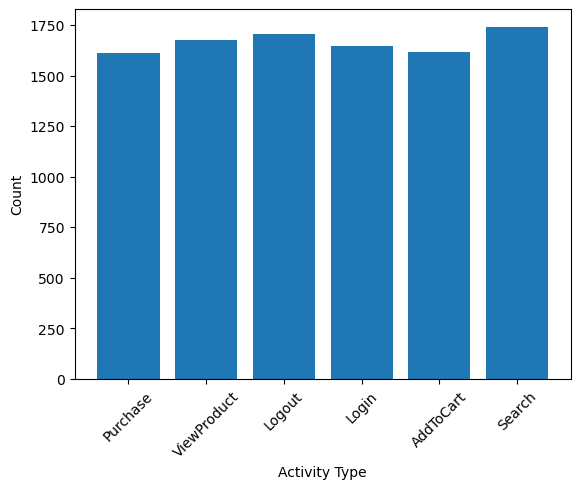

In [19]:
plt.bar(df3['Activity'],df3['count'])
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
x=df2.groupBy('UserID').agg(F.count(df2.Activity))

In [21]:
x.count()

1000

In [22]:
data=x[x['count(Activity)']>15]
data=data.toPandas()

In [23]:
data.count()

UserID             45
count(Activity)    45
dtype: int64

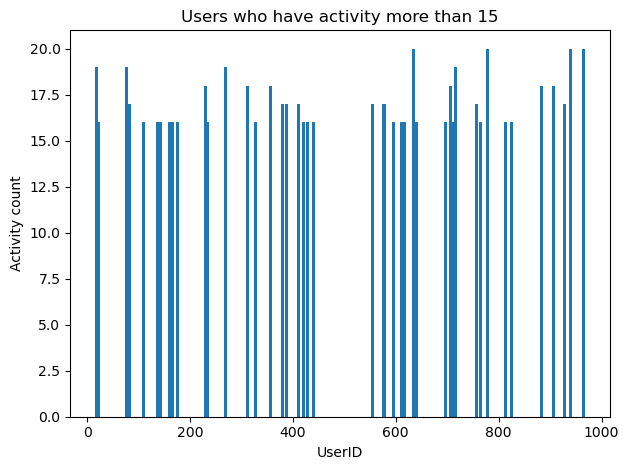

In [24]:
data
plt.bar(data['UserID'], data['count(Activity)'],width=6)
plt.title('Users who have activity more than 15')
plt.xlabel('UserID')
plt.ylabel('Activity count')
plt.tight_layout()

plt.show()

In [25]:
#Iris Dataset
df_s=spark.read.csv('C:/Users/acer/Downloads/iris.csv',header=True,inferSchema=True)

In [26]:
df_s.show()

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-

In [27]:
df_s[df_s.PetalWidthCm.isNull()].show()

+---+-------------+------------+-------------+------------+-------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|Species|
+---+-------------+------------+-------------+------------+-------+
+---+-------------+------------+-------------+------------+-------+



In [28]:
df_s.count()

150

In [29]:
df_s.select('Species').distinct().show()

+---------------+
|        Species|
+---------------+
| Iris-virginica|
|    Iris-setosa|
|Iris-versicolor|
+---------------+



In [30]:
df_s.select('Species').count()

150

In [37]:
df_s.columns

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [31]:
from pyspark.ml.feature import VectorAssembler
features=VectorAssembler(inputCols=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],outputCol="Features")

In [33]:
output=features.transform(df_s)

In [34]:
output.show()

+---+-------------+------------+-------------+------------+-----------+-----------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|         Features|
+---+-------------+------------+-------------+------------+-----------+-----------------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|  9|     